In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


In [413]:
df = pd.read_csv('./profiling_results.csv', sep=';')

In [414]:
df.head()

,alg,func,bit,time
0,sha256,Hash value computing,256,0.000031
1,sha256,Hash value computing,256,0.000019
2,sha256,Hash value computing,256,0.000033
3,sha256,Hash value computing,256,0.000023
4,ecdsa,Key pair generation,256,0.076861


In [415]:
df.shape

(1689, 4)

In [416]:
#total data before dropping
df.describe()

,bit,time
count,1689.000000,1689.000000
mean,301.622262,3.394908
std,97.997930,24.967192
min,256.000000,0.000016
25%,256.000000,0.000105
50%,256.000000,0.078314
75%,256.000000,0.578920
max,512.000000,435.975189


In [417]:
df.alg.unique()

array(['sha256', 'ecdsa', 'gost', 'sha512', 'keccak256', 'scrypt', 'x17',
       'ethash', 'x11', 'myr-groestl_hash', 'lyra2re2_hash', 'blake2s',
       'blake2b'], dtype=object)

In [418]:
#let's create a new database with datas of time depends on algorithms
columns = df.alg.unique()
d = {}
for i in range(len(df)):
    if df.alg[i] in d:
        d[df.alg[i]].append(df.time[i])
    else:
        d[df.alg[i]]=[]

In [419]:
for elem in d:
    print(len(d[elem]))

565
289
106
99
92
60
98
55
58
83
58
55
58


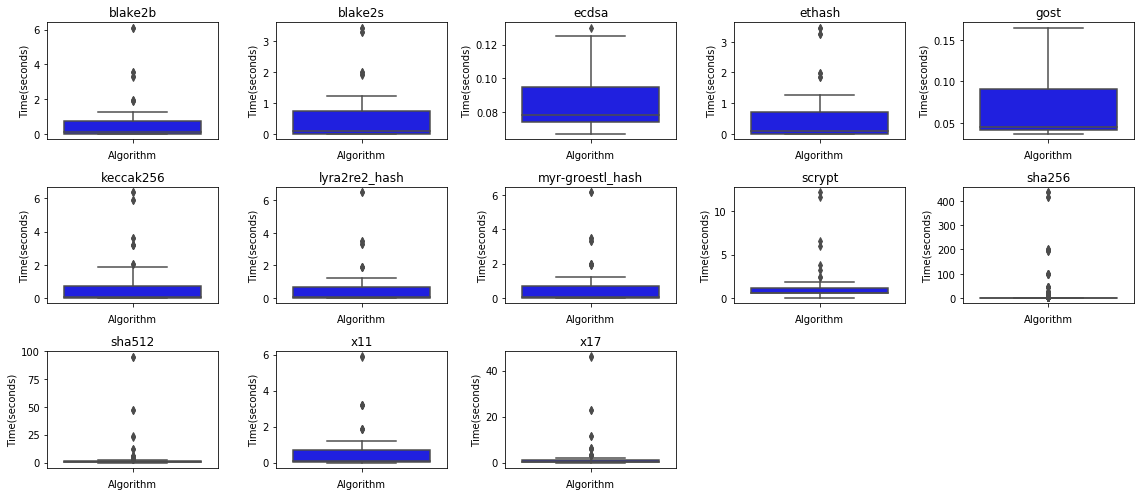

In [451]:
i=1
plt.figure(figsize=(16,7))
for elem in df.alg.unique():
    plt.subplot(3,5,i)
    sns.boxplot(y=d[elem], color='b')
    plt.title(elem)
    plt.xlabel('Algorithm')
    plt.ylabel('Time(seconds)')
    i+=1
plt.tight_layout()
plt.savefig('boxes.png')
plt.show()

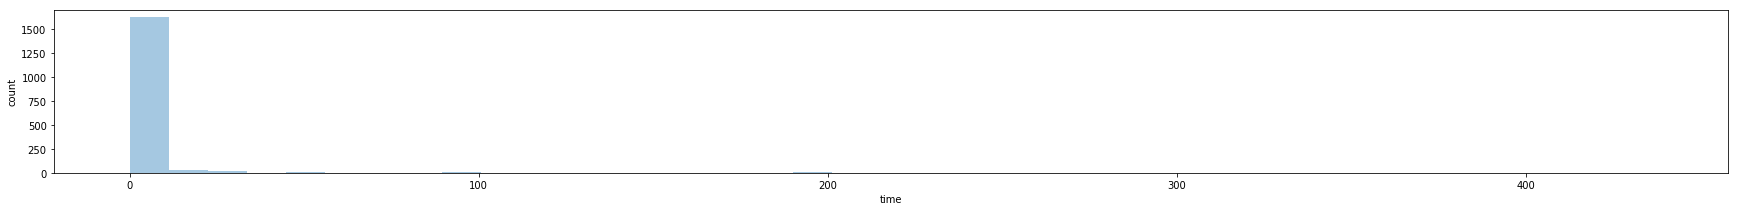

In [421]:
#only for visualization that all values are concentrated in beginning
plt.figure(figsize=(30, 3))
sns.distplot(df.time, bins=39, kde=False)
plt.ylabel('count')
plt.show()

дропну все данные, у которых время выше 5. Потому что эта циферка ни к кому в доверительный интервал не попадает.

In [422]:
df = df.drop(df[df.time > 5].index)
len(df)

1575

Со средними получается не распределение, а точка на графике, потому что среднее считал для каждого алгоритма+функции, так что я сделал такие графики

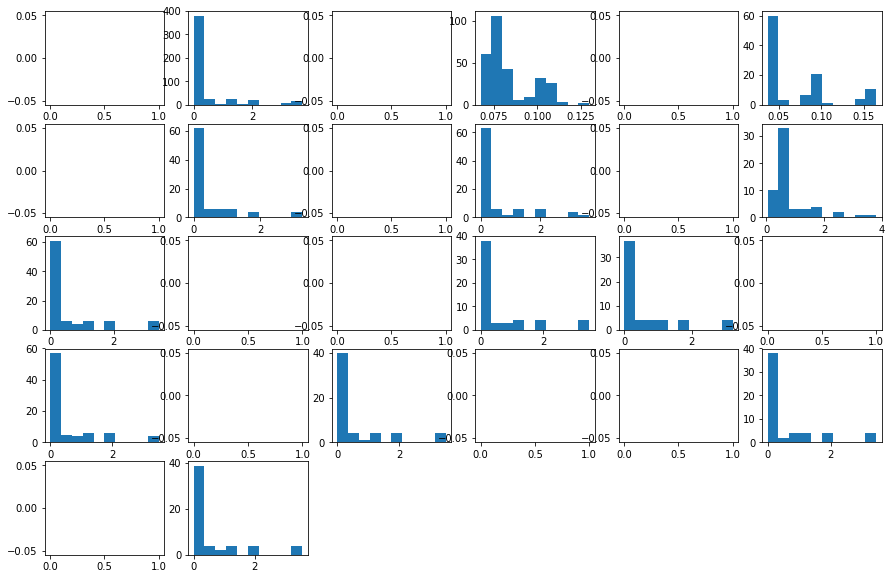

In [423]:
plt.figure(figsize=(15,10))
plt.tight_layout()
i=1
for elem in columns:

    x = df[(df.alg==elem) & (df.bit== 512)].func
    y = df[(df.alg==elem) & (df.bit== 512)].time
    plt.subplot(5,6,i)
    plt.hist(y)
    i+=1
    x = df[(df.alg==elem) & (df.bit== 256)].func
    y = df[(df.alg==elem) & (df.bit== 256)].time
    plt.subplot(5,6,i)
    plt.hist(y)
    i+=1
plt.show()


In [424]:
#here we are to drop all ecsda and gost rows first
df_1 = df.drop(df[df.alg=='ecdsa'].index, axis=0)
df_1 = df_1.drop(df[df.alg=='gost'].index, axis=0)
df_1.head()

,alg,func,bit,time
0,sha256,Hash value computing,256,0.000031
1,sha256,Hash value computing,256,0.000019
2,sha256,Hash value computing,256,0.000033
3,sha256,Hash value computing,256,0.000023
101,sha256,Hash value computing,256,0.000073


In [425]:
df_2 = pd.concat([df[(df.alg=='ecdsa')],df[(df.alg=='gost')]],  axis=0)
df_2.head()

,alg,func,bit,time
4,ecdsa,Key pair generation,256,0.076861
5,ecdsa,Key pair generation,256,0.074096
6,ecdsa,Signing message,256,0.102613
7,ecdsa,Verifying signature,256,0.083898
8,ecdsa,Key pair generation,256,0.080067


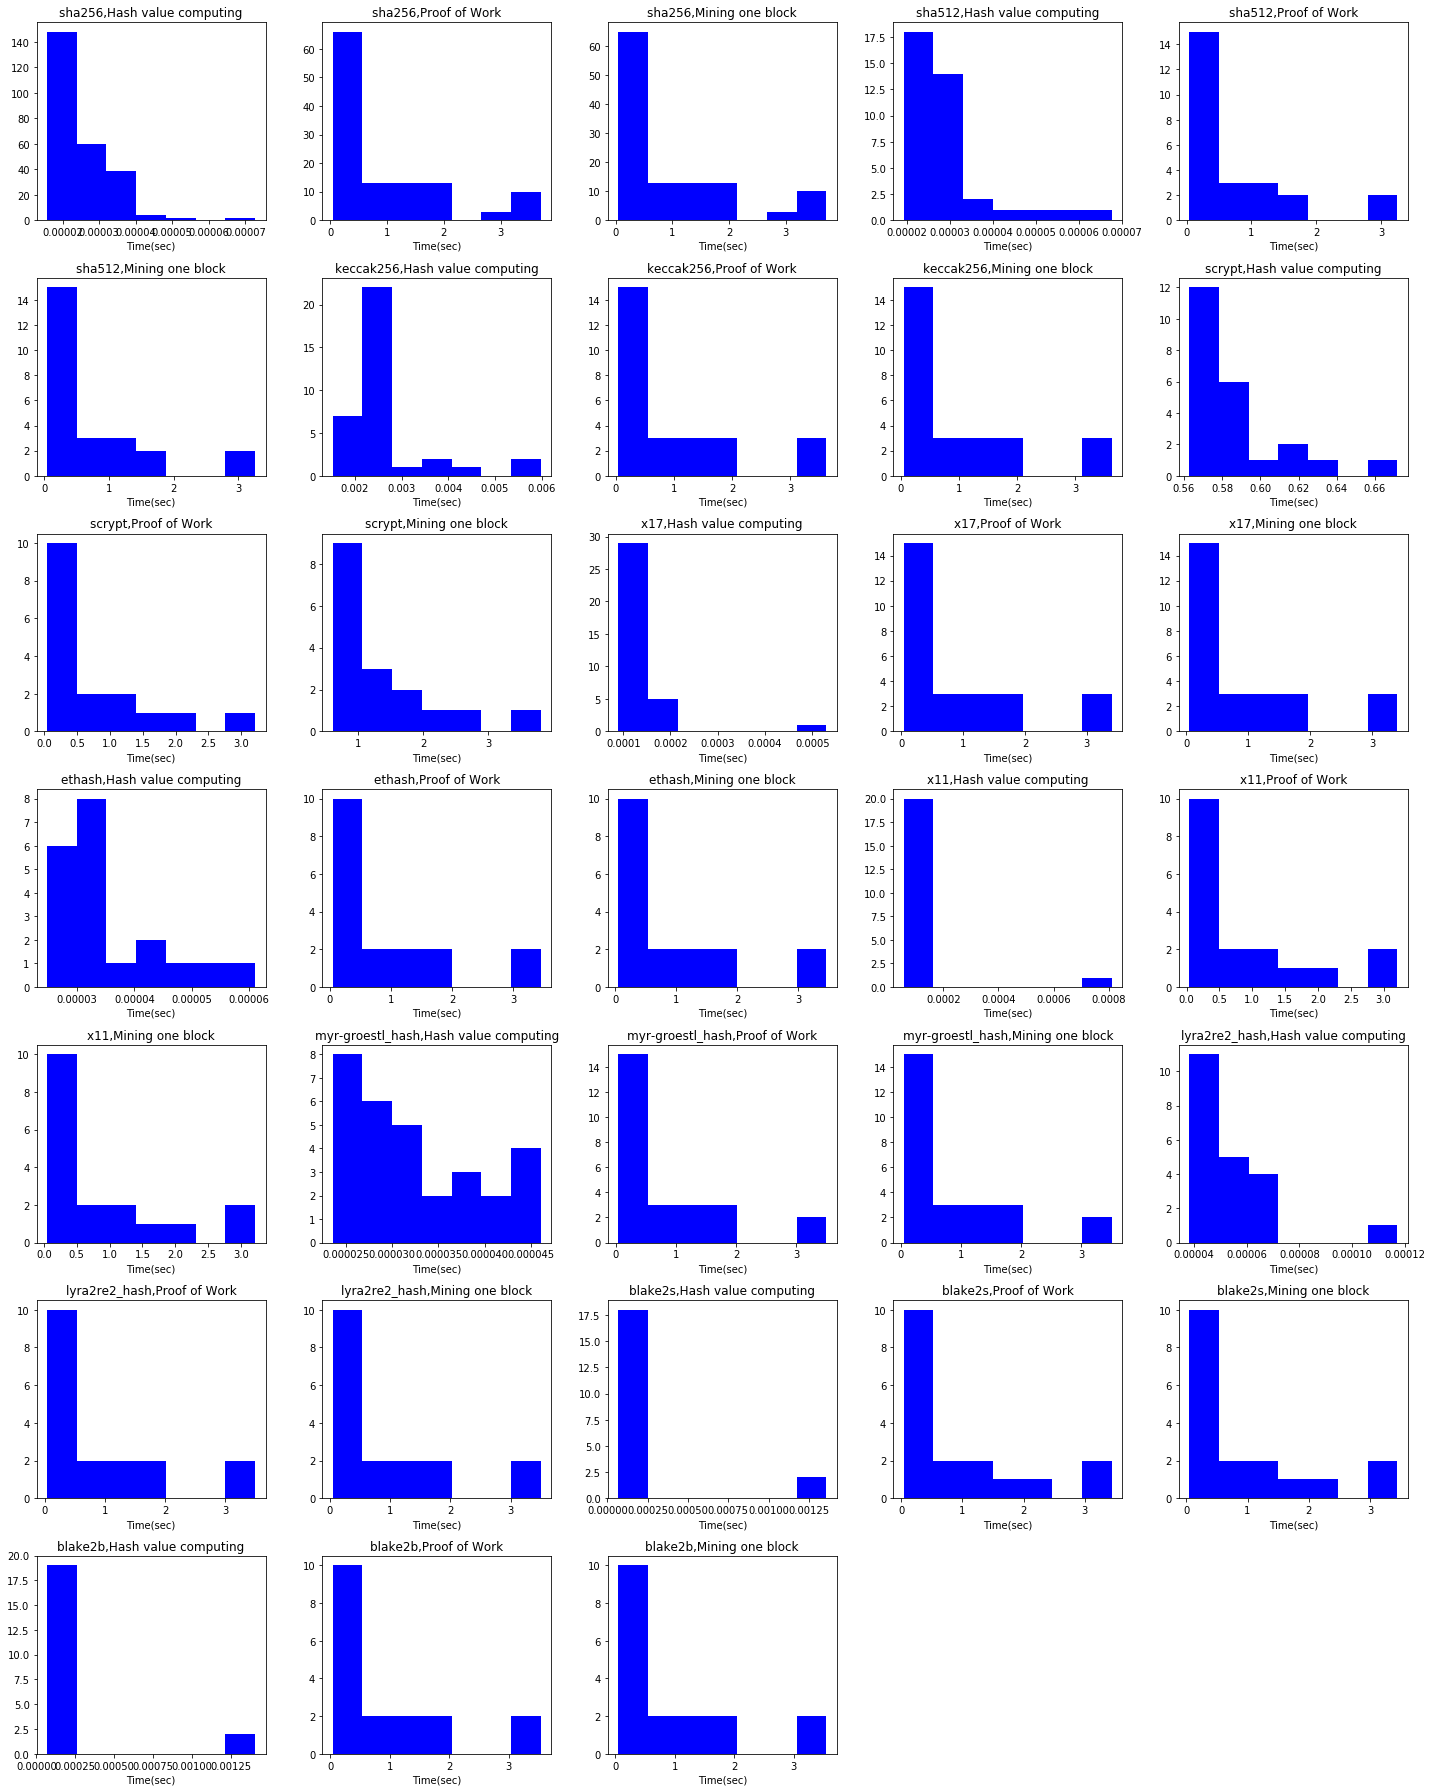

In [426]:

plt.figure(figsize=(20,25))
i=1
columns = df_1.alg.unique()
functions = df_1.func.unique()
for elem in columns:
    for elem2 in functions:
        y = df_1[(df_1.alg==elem) & (df_1.func==elem2)].time
        plt.subplot(7,5,i)
        i+=1
        plt.hist(y, bins=7, color='b')
        plt.title(elem+','+elem2)
        plt.xlabel('Time(sec)')
plt.tight_layout()
plt.savefig('hists_hashing.png')
plt.show()

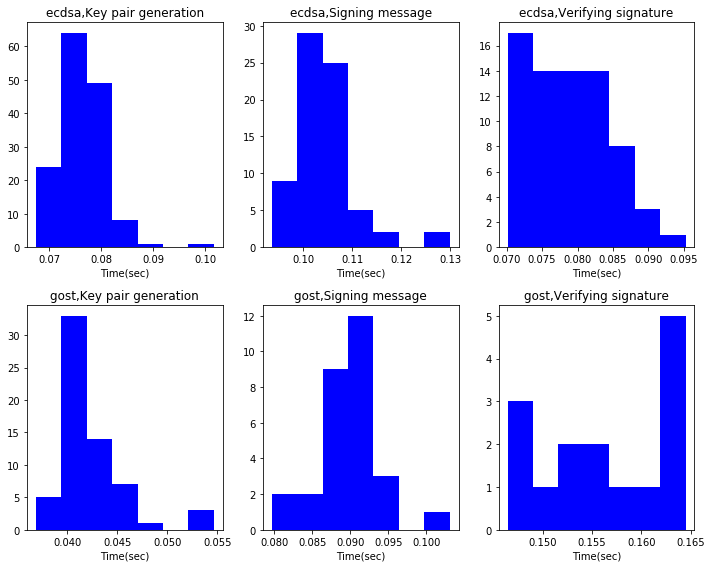

In [427]:
plt.figure(figsize=(10,8))
i=1
columns = df_2.alg.unique()
functions = df_2.func.unique()
for elem in columns:
    for elem2 in functions:
    
        y = df_2[(df_2.alg==elem) & (df_2.func==elem2)].time
        plt.subplot(2,3,i)
        i+=1
        plt.hist(y, bins=7, color='b')
        plt.title(elem+','+elem2)
        plt.xlabel('Time(sec)')
plt.tight_layout()
plt.savefig('hists_dss.png')
plt.show()

In [428]:
df = df.groupby(['alg', 'func','bit'], as_index=False).median()

In [429]:
#some data for preprocessing after dropping
df.describe()

,bit,time
count,39.000000,39.000000
mean,334.769231,0.238377
std,119.698406,0.200416
min,256.000000,0.000022
25%,256.000000,0.021737
50%,256.000000,0.338308
75%,512.000000,0.348808
max,512.000000,0.920705


 можно посмотреть, насколько от выбросов сместилась оценка

In [430]:
df.shape

(39, 4)

In [431]:
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df.head()

,alg,func,bit,time
0,blake2b,Hash value computing,256,0.000101
1,blake2b,Mining one block,256,0.357281
2,blake2b,Proof of Work,256,0.351154
3,blake2s,Hash value computing,256,0.000077
4,blake2s,Mining one block,256,0.350717


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1ad35d550>,
      dtype=object)

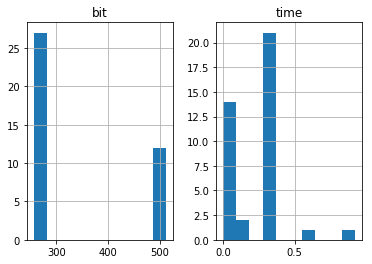

In [432]:
#lilbitmorebeautiful
df.hist()

In [433]:
df.bit.nunique()

2

In [434]:
df

,alg,func,bit,time
0,blake2b,Hash value computing,256,0.000101
1,blake2b,Mining one block,256,0.357281
2,blake2b,Proof of Work,256,0.351154
3,blake2s,Hash value computing,256,0.000077
4,blake2s,Mining one block,256,0.350717
5,blake2s,Proof of Work,256,0.344843
6,ecdsa,Key pair generation,256,0.076112
7,ecdsa,Signing message,256,0.103625
8,ecdsa,Verifying signature,256,0.077667
9,ethash,Hash value computing,256,0.000033


In [435]:
df.loc[df['alg']=='sha256', 'lang'] = 'C'
df.loc[df['alg']=='sha512', 'lang'] = 'C'
df.loc[df['alg']=='ethash', 'lang'] = 'C'
df.loc[df['alg']=='keccak256', 'lang'] = 'Python'
df.loc[df['alg']=='blake2b', 'lang'] = 'C'
df.loc[df['alg']=='blake2s', 'lang'] = 'C'
df.loc[df['alg']=='gost', 'lang'] = 'Python'
df.loc[df['alg']=='ecdsa', 'lang'] = 'Python'
df.loc[df['alg']=='scrypt', 'lang'] = 'Python'
df.loc[df['alg']=='lyra2re2_hash', 'lang'] = 'C'
df.loc[df['alg']=='myr-groestl_hash', 'lang'] = 'C'
df.loc[df['alg']=='x11', 'lang'] = 'C'
df.loc[df['alg']=='x17', 'lang'] = 'C'


df

,alg,func,bit,time,lang
0,blake2b,Hash value computing,256,0.000101,C
1,blake2b,Mining one block,256,0.357281,C
2,blake2b,Proof of Work,256,0.351154,C
3,blake2s,Hash value computing,256,0.000077,C
4,blake2s,Mining one block,256,0.350717,C
5,blake2s,Proof of Work,256,0.344843,C
6,ecdsa,Key pair generation,256,0.076112,Python
7,ecdsa,Signing message,256,0.103625,Python
8,ecdsa,Verifying signature,256,0.077667,Python
9,ethash,Hash value computing,256,0.000033,C


In [436]:
hash_comp = df.loc[df['func']=='Hash value computing', ['alg', 'time', 'lang']]
mine = df.loc[df['func']=='Mining one block', ['alg', 'time', 'lang']]
kpg = df.loc[df['func']=='Key pair generation', ['alg', 'time', 'lang']]
sign = df.loc[df['func']=='Signing message', ['alg', 'time', 'lang']]
verif = df.loc[df['func']=='Verifying signature', ['alg', 'time', 'lang']]

In [437]:
hash_comp.sort_values(by='time')

,alg,time,lang
27,sha256,0.000022,C
30,sha512,0.000027,C
21,myr-groestl_hash,0.000030,C
9,ethash,0.000033,C
18,lyra2re2_hash,0.000046,C
33,x11,0.000070,C
3,blake2s,0.000077,C
0,blake2b,0.000101,C
36,x17,0.000118,C
15,keccak256,0.002299,Python


In [438]:
verif

,alg,time,lang
8,ecdsa,0.077667,Python
14,gost,0.155715,Python


In [439]:
# mine[mine['time'] < 0.9].sort_values(by='time').plot(kind='bar', x='alg', y=['time'], color='bbbbbbbbbb');

In [440]:
# mine.sort_values(by='time').plot(kind='bar', x='alg', y=['time'], color='bbbbbrbbbbr');

In [441]:
# hash_comp[hash_comp['time'] < 0.002].sort_values(by='time').plot(kind='bar', x='alg', y=['time'], color='bbbbbbb')
# plt.legend(labels=['Python']);

In [442]:
# toplot = hash_comp[hash_comp['time'] < 0.002].sort_values(by='time').copy()
# toplot = toplot.sort_values(by='time')
# toplot = toplot.reset_index()
# toplot = toplot.drop('index', axis=1)
# h = plt.bar(list(toplot.index), toplot['time'])
# xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
# plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45)
# plt.xlabel('Algorithms')
# plt.ylabel('Runtime, sec')
# plt.show();

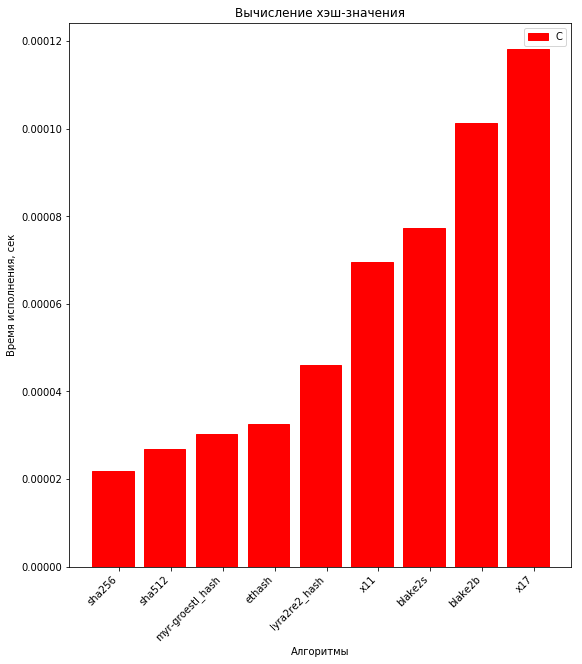

In [443]:
fig = plt.figure(figsize=(9, 10))
toplot = hash_comp[hash_comp['time'] < 0.002].sort_values(by='time').copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'], label='C')
h[0].set_color('r')
h[1].set_color('r')
h[2].set_color('r')
h[3].set_color('r')
h[4].set_color('r')
h[5].set_color('r')
h[6].set_color('r')
h[7].set_color('r')
h[8].set_color('r')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45)
plt.xlabel('Алгоритмы')
plt.ylabel('Время исполнения, сек')
plt.title('Вычисление хэш-значения')



# blue_line = matplotlib.lines.Line2D([], [], color='blue', markersize=100, label='Green line')
# handles = [blue_line]
# labels = ['Python'] 
# plt.legend(handles=handles, labels=labels)
plt.legend()


plt.show();

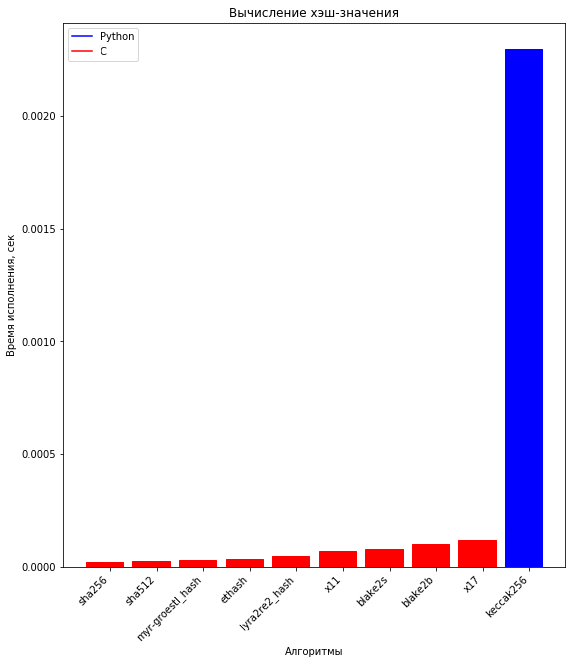

In [444]:
fig = plt.figure(figsize=(9, 10))
toplot = hash_comp[hash_comp['time'] < 0.5].sort_values(by='time').copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'])
h[0].set_color('r')
h[1].set_color('r')
h[2].set_color('r')
h[3].set_color('r')
h[4].set_color('r')
h[5].set_color('r')
h[6].set_color('r')
h[7].set_color('r')
h[8].set_color('r')
h[-1].set_color('b')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45)
plt.xlabel('Алгоритмы')
plt.ylabel('Время исполнения, сек')
plt.title('Вычисление хэш-значения')



red_line = matplotlib.lines.Line2D([], [], color='red',markersize=100, label='Blue line')
blue_line = matplotlib.lines.Line2D([], [], color='blue', markersize=100, label='Green line')
handles = [blue_line, red_line, ]
labels = ['Python', 'С'] 
plt.legend(handles=handles, labels=labels)



plt.show();

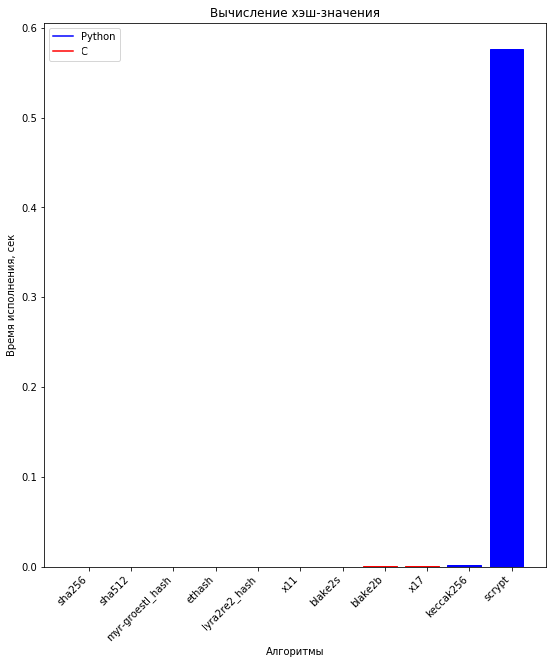

In [445]:
fig = plt.figure(figsize=(9, 10))
toplot = hash_comp[hash_comp['time'] < 0.6].sort_values(by='time').copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'])
h[0].set_color('r')
h[1].set_color('r')
h[2].set_color('r')
h[3].set_color('r')
h[4].set_color('r')
h[5].set_color('r')
h[6].set_color('r')
h[7].set_color('r')
h[8].set_color('r')
h[9].set_color('b')
h[-1].set_color('b')

xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45)
plt.xlabel('Алгоритмы')
plt.ylabel('Время исполнения, сек')
plt.title('Вычисление хэш-значения')



red_line = matplotlib.lines.Line2D([], [], color='red',markersize=100, label='Blue line')
blue_line = matplotlib.lines.Line2D([], [], color='blue', markersize=100, label='Green line')
handles = [blue_line, red_line, ]
labels = ['Python', 'С'] 
plt.legend(handles=handles, labels=labels)



plt.show();

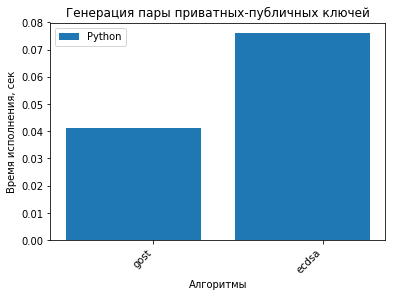

In [446]:
toplot = kpg.copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'], label='Python')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45)
plt.xlabel('Алгоритмы')
plt.ylabel('Время исполнения, сек')
plt.title('Генерация пары приватных-публичных ключей')

plt.legend()
plt.show();

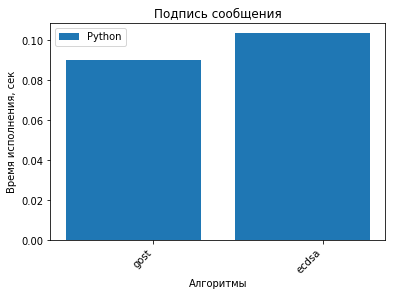

In [447]:
toplot = sign.copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'], label='Python')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45)
plt.xlabel('Алгоритмы')
plt.ylabel('Время исполнения, сек')
plt.title('Подпись сообщения')

plt.legend()
plt.show();

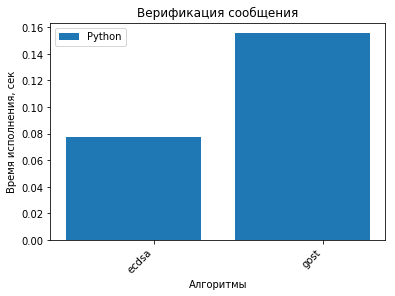

In [448]:
toplot = verif.copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'], label='Python')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45)
plt.xlabel('Алгоритмы')
plt.ylabel('Время исполнения, сек')
plt.title('Верификация сообщения')

plt.legend()
plt.show();

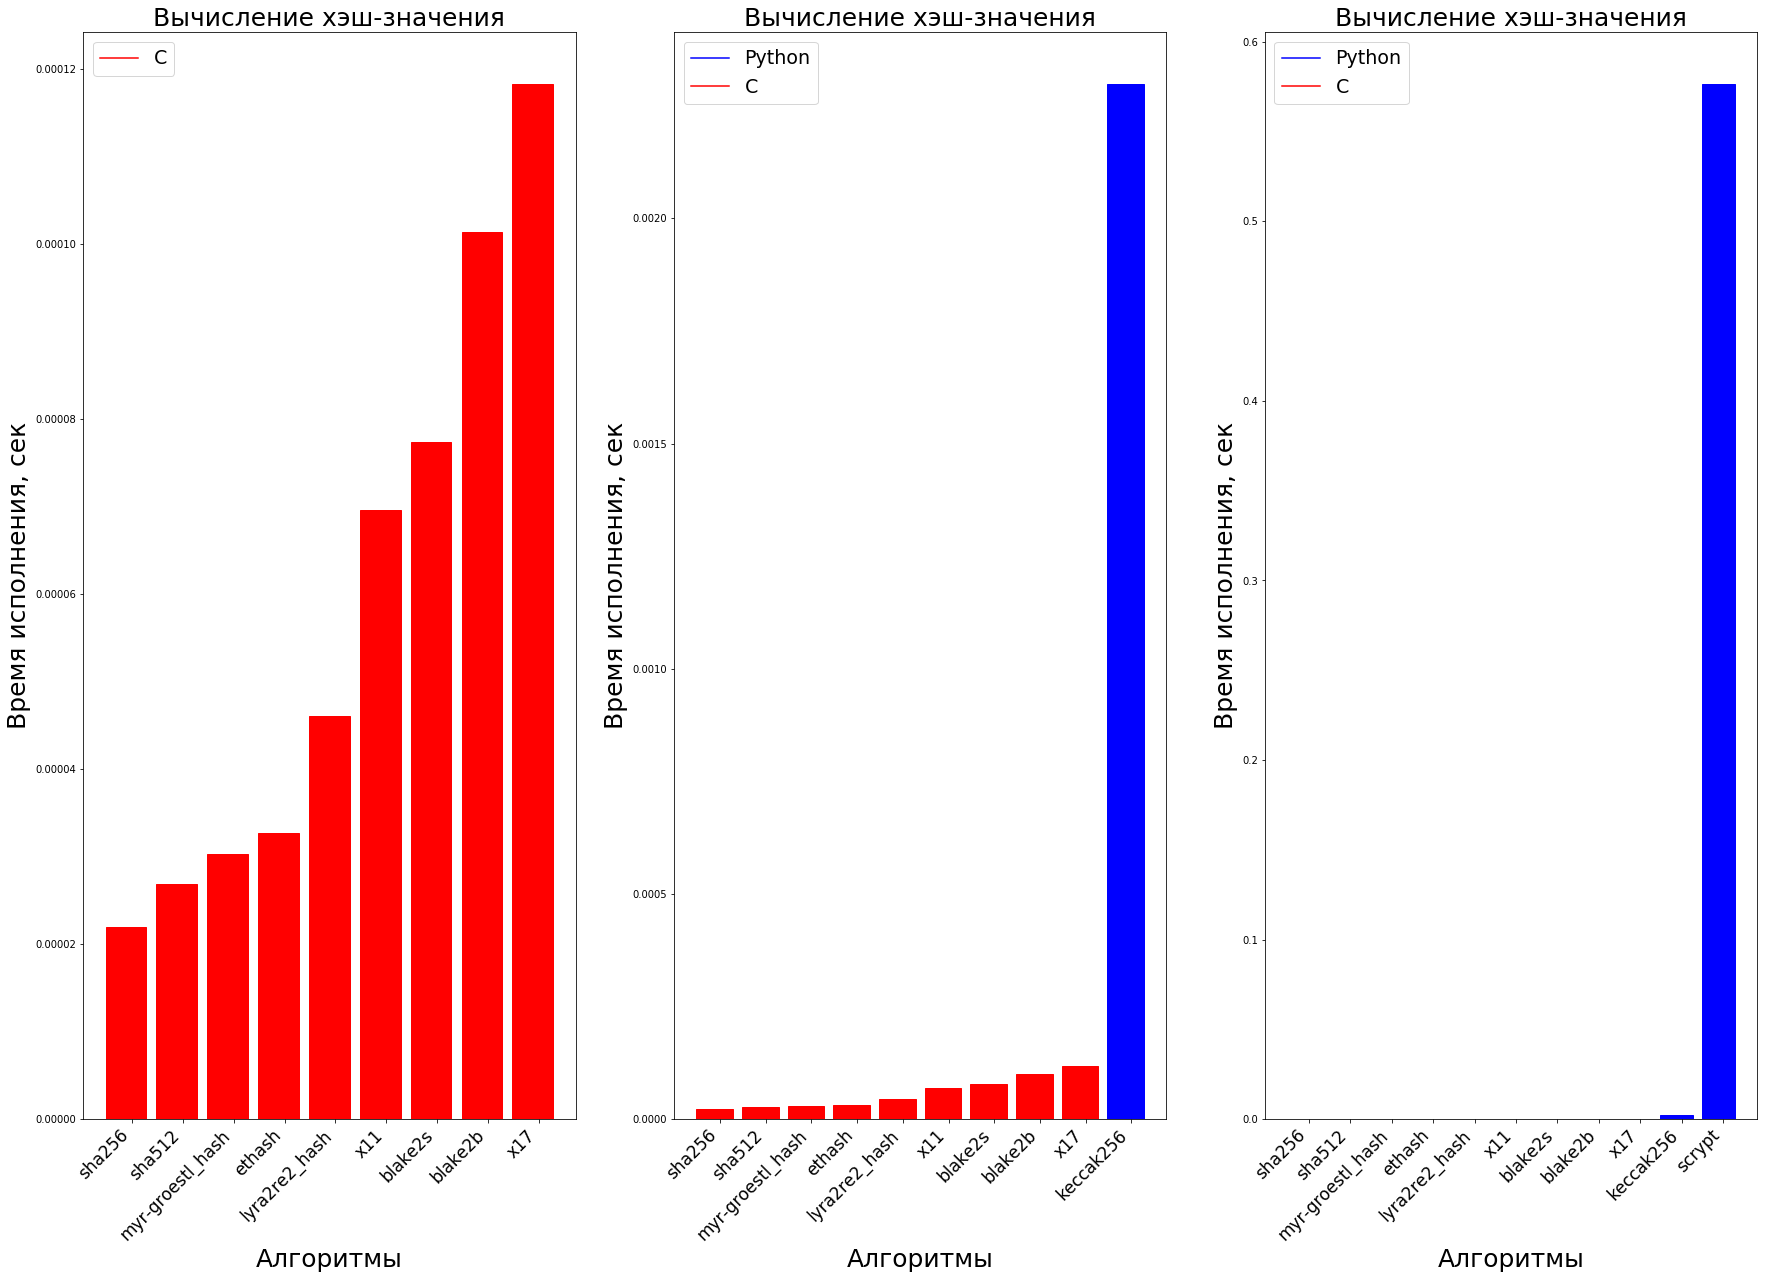

In [449]:
fig = plt.figure(figsize=(30, 20))
plt.subplot(1, 3, 1)
toplot = hash_comp[hash_comp['time'] < 0.002].sort_values(by='time').copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'])
h[0].set_color('r')
h[1].set_color('r')
h[2].set_color('r')
h[3].set_color('r')
h[4].set_color('r')
h[5].set_color('r')
h[6].set_color('r')
h[7].set_color('r')
h[8].set_color('r')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45, fontsize=17)
plt.xlabel('Алгоритмы', fontsize=25)
plt.ylabel('Время исполнения, сек', fontsize=25)
plt.title('Вычисление хэш-значения', fontsize=25)



red_line = matplotlib.lines.Line2D([], [], color='red',markersize=100, label='Blue line')
handles = [ red_line, ]
labels = ['С'] 
plt.legend(handles=handles, labels=labels, fontsize=19, loc=2)



plt.subplot(1, 3, 2)
toplot = hash_comp[hash_comp['time'] < 0.5].sort_values(by='time').copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'])
h[0].set_color('r')
h[1].set_color('r')
h[2].set_color('r')
h[3].set_color('r')
h[4].set_color('r')
h[5].set_color('r')
h[6].set_color('r')
h[7].set_color('r')
h[8].set_color('r')
h[-1].set_color('b')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45, fontsize=17)
plt.xlabel('Алгоритмы', fontsize=25)
plt.ylabel('Время исполнения, сек', fontsize=25)
plt.title('Вычисление хэш-значения', fontsize=25)



red_line = matplotlib.lines.Line2D([], [], color='red',markersize=100, label='Blue line')
blue_line = matplotlib.lines.Line2D([], [], color='blue', markersize=100, label='Green line')
handles = [blue_line, red_line, ]
labels = ['Python', 'С'] 
plt.legend(handles=handles, labels=labels, fontsize=19)



plt.subplot(1, 3, 3)
toplot = hash_comp[hash_comp['time'] < 0.6].sort_values(by='time').copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'])
h[0].set_color('r')
h[1].set_color('r')
h[2].set_color('r')
h[3].set_color('r')
h[4].set_color('r')
h[5].set_color('r')
h[6].set_color('r')
h[7].set_color('r')
h[8].set_color('r')
h[9].set_color('b')
h[-1].set_color('b')

xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45, fontsize=17)
plt.xlabel('Алгоритмы', fontsize=25)
plt.ylabel('Время исполнения, сек', fontsize=25)
plt.title('Вычисление хэш-значения', fontsize=25)



red_line = matplotlib.lines.Line2D([], [], color='red',markersize=100, label='Blue line')
blue_line = matplotlib.lines.Line2D([], [], color='blue', markersize=100, label='Green line')
handles = [blue_line, red_line, ]
labels = ['Python', 'С'] 
plt.legend(handles=handles, labels=labels, fontsize=19)

plt.savefig('hash_comparison.png')
plt.show();

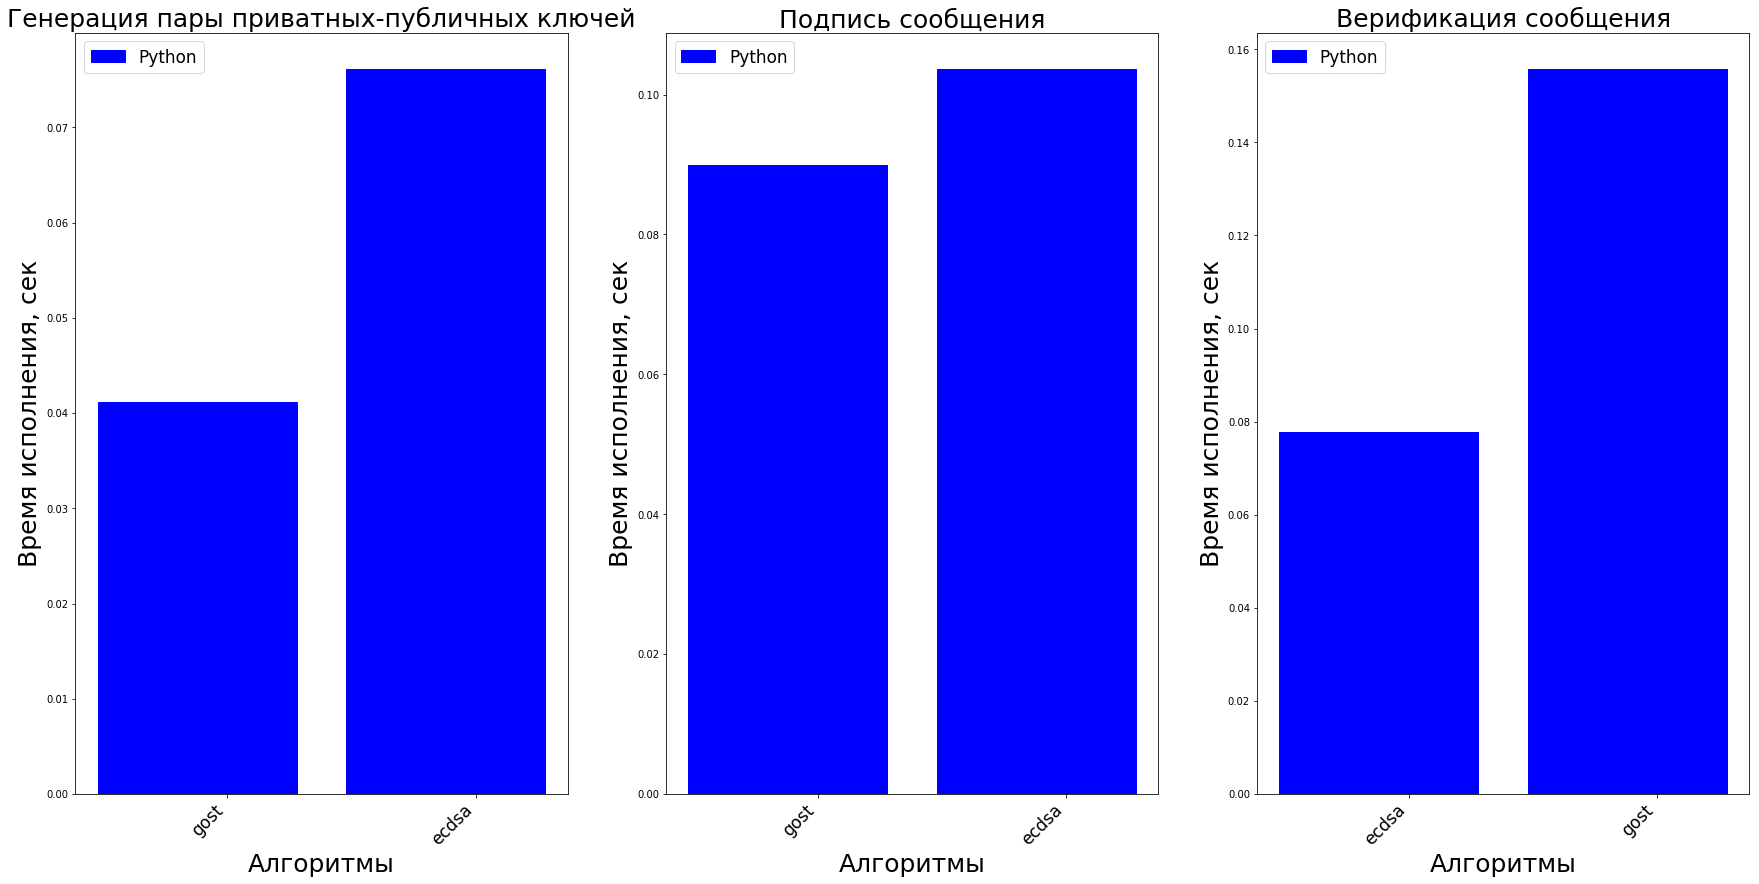

In [450]:
fig = plt.figure(figsize=(30, 14))
plt.subplot(1, 3, 1)
toplot = kpg.copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'], label='Python')
h[0].set_color('b')
h[1].set_color('b')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45, fontsize=17)
plt.xlabel('Алгоритмы', fontsize=25)
plt.ylabel('Время исполнения, сек', fontsize=25)
plt.title('Генерация пары приватных-публичных ключей', fontsize=25)

plt.legend(fontsize=17)

plt.subplot(1, 3, 2)
toplot = sign.copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'], label='Python')
h[0].set_color('b')
h[1].set_color('b')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45, fontsize=17)
plt.xlabel('Алгоритмы', fontsize=25)
plt.ylabel('Время исполнения, сек', fontsize=25)
plt.title('Подпись сообщения', fontsize=25)

plt.legend(fontsize=17)

plt.subplot(1, 3, 3)
toplot = verif.copy()
toplot = toplot.sort_values(by='time')
toplot = toplot.reset_index()
toplot = toplot.drop('index', axis=1)
h = plt.bar(list(toplot.index), toplot['time'], label='Python')
h[0].set_color('b')
h[1].set_color('b')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, list(toplot['alg']),  ha='right', rotation=45, fontsize=17)
plt.xlabel('Алгоритмы', fontsize=25)
plt.ylabel('Время исполнения, сек', fontsize=25)
plt.title('Верификация сообщения', fontsize=25)

plt.legend(fontsize=17)

plt.savefig('dss_comparison.png')
plt.show();